In [1]:
data("AirPassengers")
AP <- AirPassengers
AP

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [2]:
class(AP);start(AP)
end(AP); frequency(AP)

[1] "ts"

[1] 1949    1

[1] 1960   12

[1] 12

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

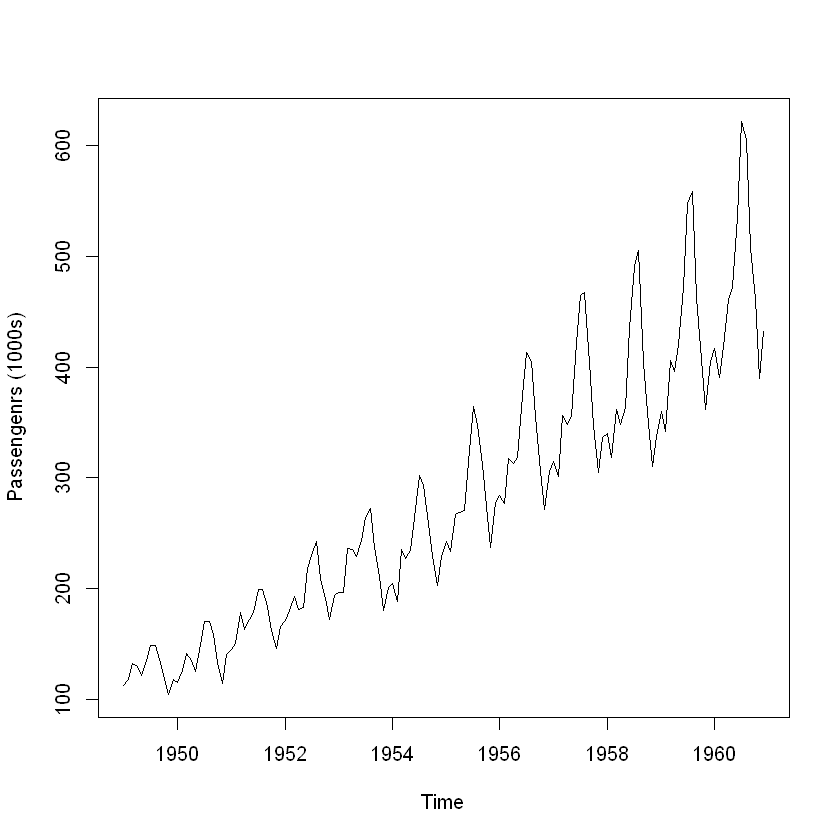

In [3]:
summary(AP)
plot(AP, ylab='Passengenrs (1000s)')

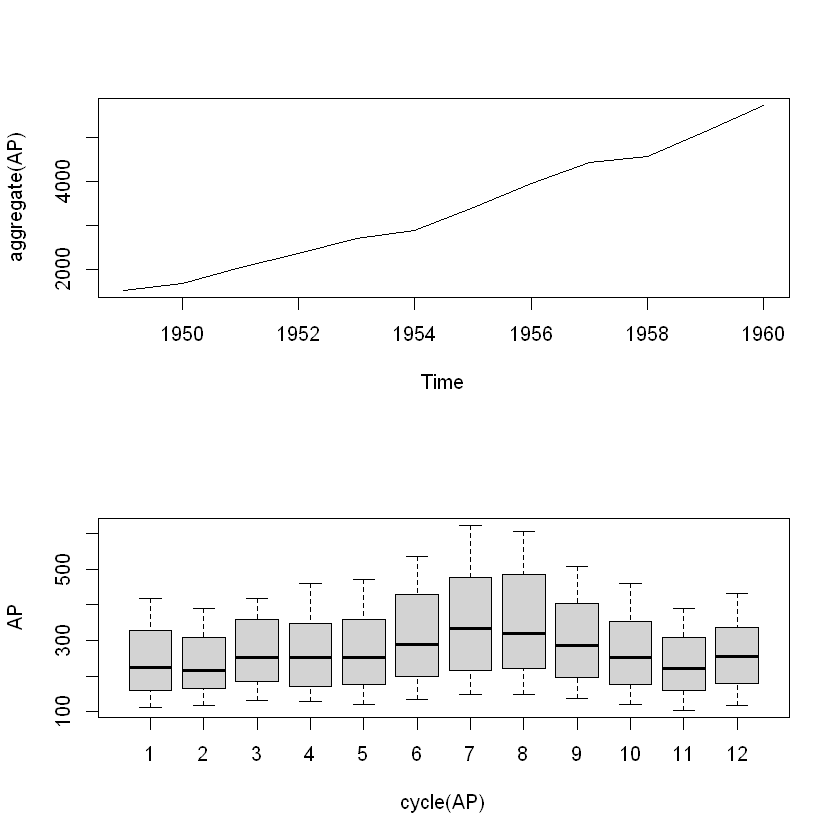

In [4]:
layout(1:2)
plot(aggregate(AP)) # la función aggregate saca la estacionalidad del gráfico y deja la tendencia o lo que haya.
boxplot(AP ~ cycle(AP)) # la funcion cycle extrae la estacionalidad para cada
                        # item, cada número es un més, el 6 es junio.

In [5]:
www <- 'https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/Maine.dat'
Maine.month <- read.table(www, header = TRUE)
attach(Maine.month)
class(Maine.month)

[1] "data.frame"

In [6]:
# con ts() transformo el dataframe en sere temporal, start indico donde empieza
# la serie que considero, por ej en el primer caso en 1996 mes 1.
Maine.month.ts <- ts(unemploy, start = c(1996, 1), freq = 12)
Maine.annual.ts <- aggregate(Maine.month.ts)/12

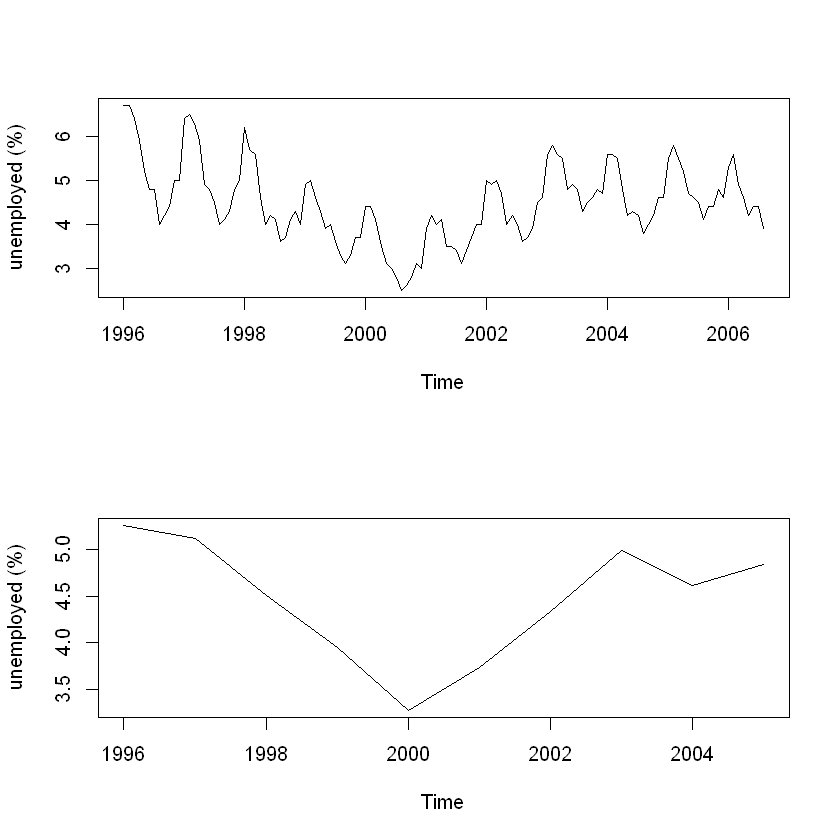

In [7]:
layout(1:2)
plot(Maine.month.ts, ylab = "unemployed (%)")
plot(Maine.annual.ts, ylab = "unemployed (%)")

In [8]:
Maine.Feb <- window(Maine.month.ts, start = c(1996,2), freq = TRUE)
Maine.Aug <- window(Maine.month.ts, start = c(1996,8), freq = TRUE)
Feb.ratio <- mean(Maine.Feb) / mean(Maine.month.ts)
Aug.ratio <- mean(Maine.Aug) / mean(Maine.month.ts)

In [9]:
Feb.ratio; Aug.ratio

[1] 1.222529

[1] 0.8163732

In [10]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/USunemp.dat'
US.month <- read.table(www, header = T)
attach(US.month)

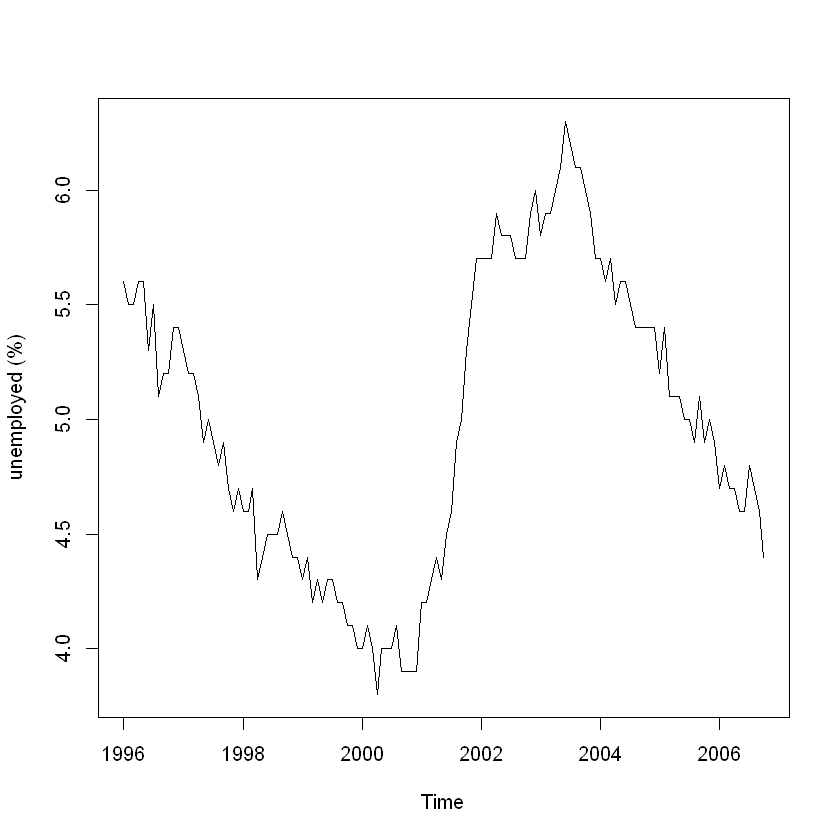

In [11]:
US.month.ts <- ts(USun, start=c(1996,1), end=c(2006,10), freq = 12)
plot(US.month.ts, ylab = "unemployed (%)")

In [12]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/cbe.dat'
CBE <- read.table(www, header = T)
CBE[1:5, ]
class(CBE)

,choc,beer,elec
,<int>,<dbl>,<int>
1,1451,96.3,1497
2,2037,84.4,1463
3,2477,91.2,1648
4,2785,81.9,1595
5,2994,80.5,1777


[1] "data.frame"

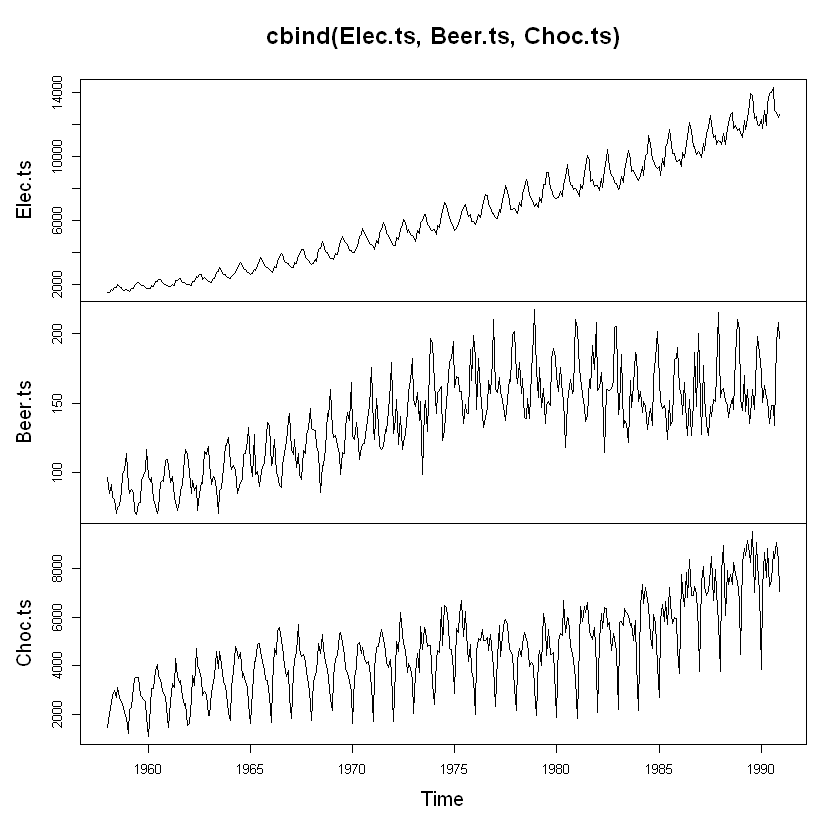

In [13]:
Elec.ts <- ts(CBE[, 3], start = 1958, freq = 12)
Beer.ts <- ts(CBE[, 2], start = 1958, freq = 12)
Choc.ts <- ts(CBE[, 1], start = 1958, freq = 12)
plot(cbind(Elec.ts, Beer.ts, Choc.ts))

In [14]:
AP.elec <- ts.intersect(AP, Elec.ts)
start(AP.elec)
end(AP.elec)

[1] 1958    1

[1] 1960   12

In [15]:
AP.elec[1:3, ]
AP <- AP.elec[,1]; Elec <- AP.elec[,2]

AP,Elec.ts
340,1497
318,1463
362,1648


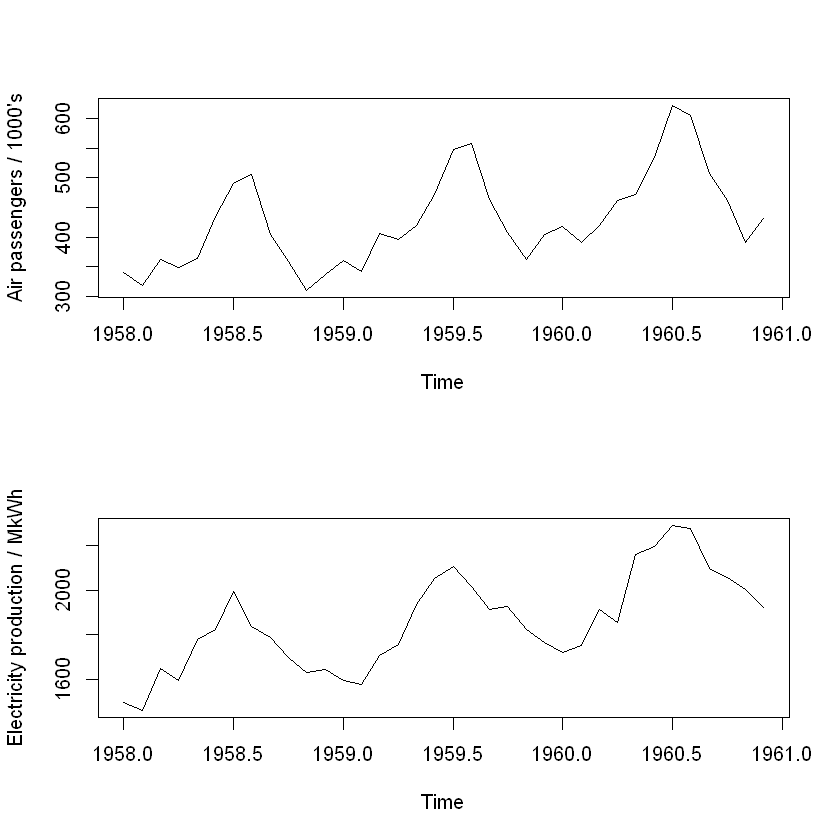

In [16]:
layout(1:2)
plot(AP, main = "", ylab = "Air passengers / 1000's")
plot(Elec, main = "", ylab = "Electricity production / MkWh")

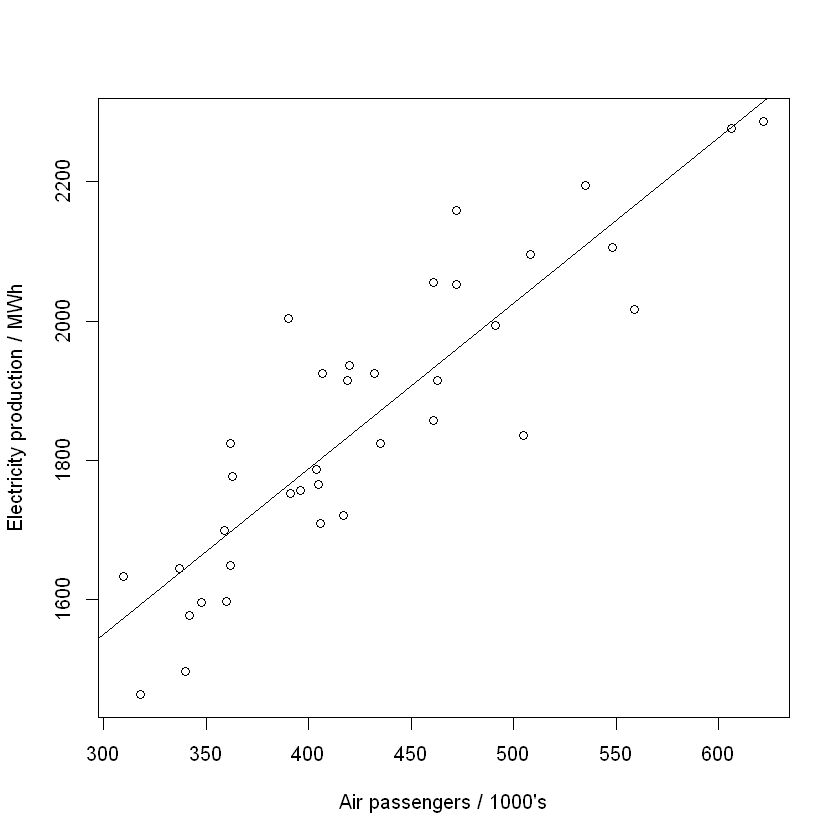

In [17]:
plot(as.vector(AP), as.vector(Elec),
     xlab = "Air passengers / 1000's",
     ylab = "Electricity production / MWh")
abline(reg = lm(Elec ~ AP))

In [18]:
cor(AP, Elec)

[1] 0.8841668

In [19]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/pounds_nz.dat'
Z <- read.table(www, header = T)
Z[1:4, ]
Z.ts <- ts(Z, st = 1991, fr = 4)

[1] 2.9243 2.9422 3.1719 3.2542

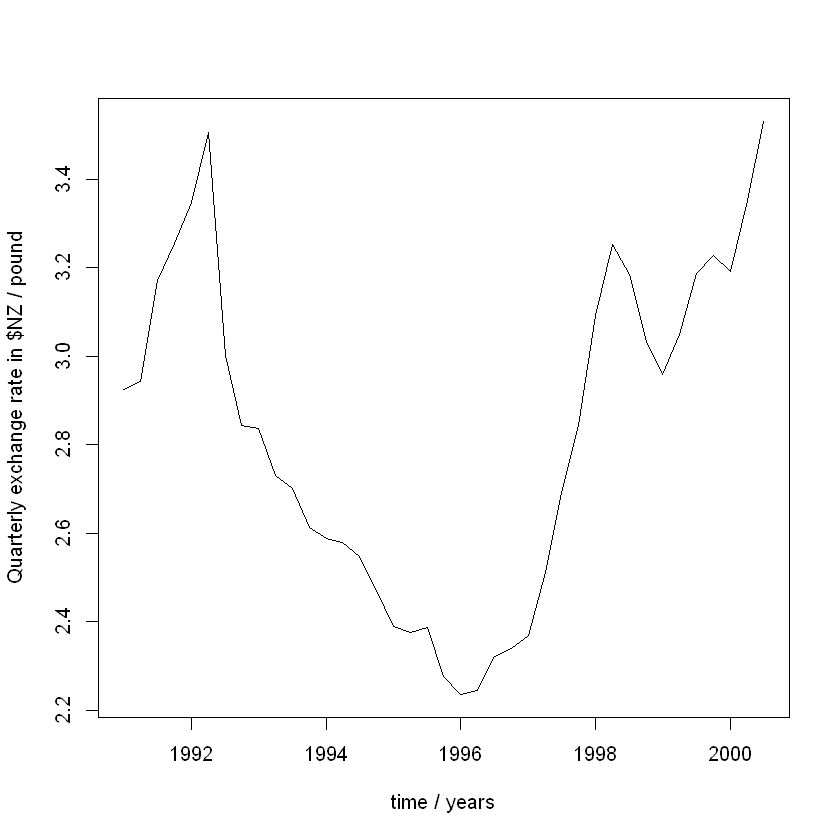

In [20]:
plot(Z.ts, xlab = "time / years",
     ylab = "Quarterly exchange rate in $NZ / pound")

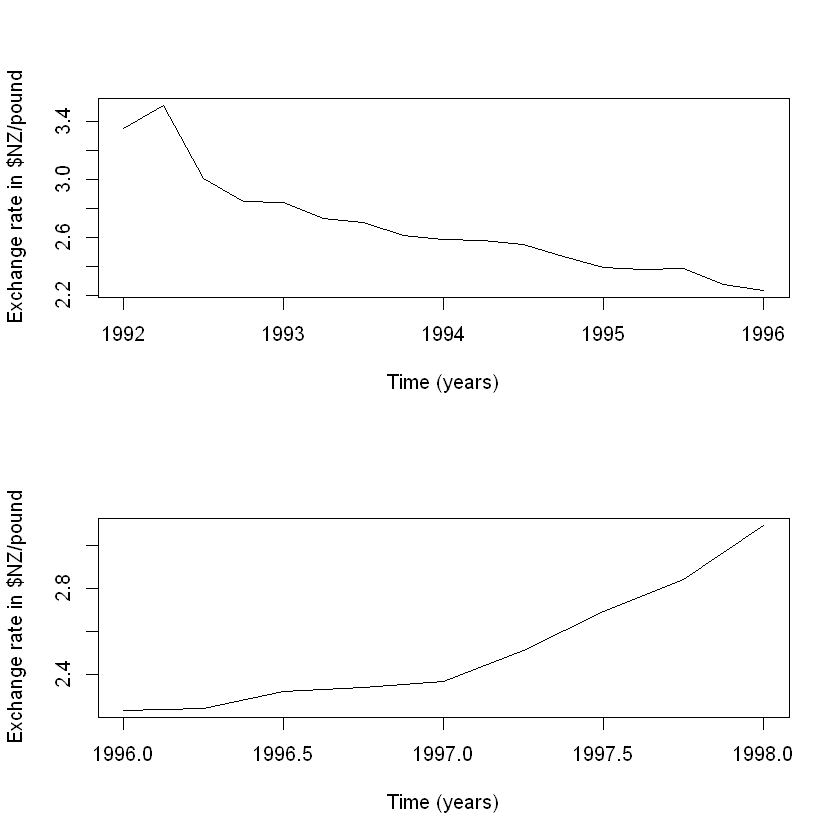

In [21]:
Z.92.96 <- window(Z.ts, start = c(1992, 1), end = c(1996, 1))
Z.96.98 <- window(Z.ts, start = c(1996, 1), end = c(1998, 1))

layout (1:2)
plot(Z.92.96, ylab = "Exchange rate in $NZ/pound",
       xlab = "Time (years)" )
plot(Z.96.98, ylab = "Exchange rate in $NZ/pound",
       xlab = "Time (years)" )

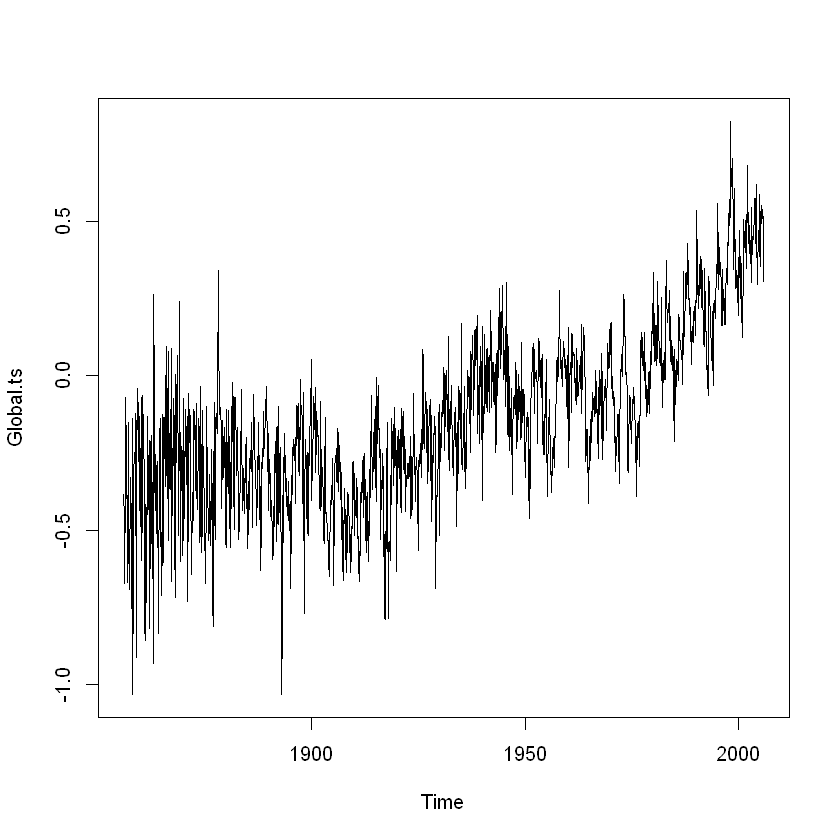

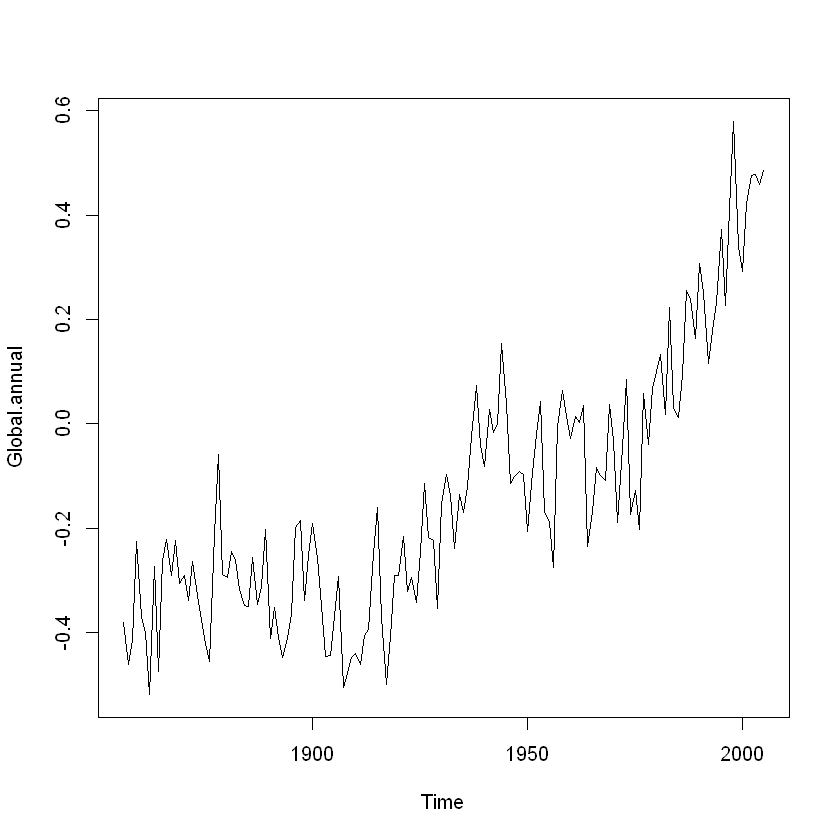

In [22]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/global.dat'
Global <- scan(www)
Global.ts <- ts(Global, st = c(1856, 1), end = c(2005, 12),
                  fr = 12)
Global.annual <- aggregate(Global.ts, FUN = mean)
# con aggregate te hace la media anual usando la fr=12 a través del argumento FUN=mean
plot(Global.ts)
plot(Global.annual)

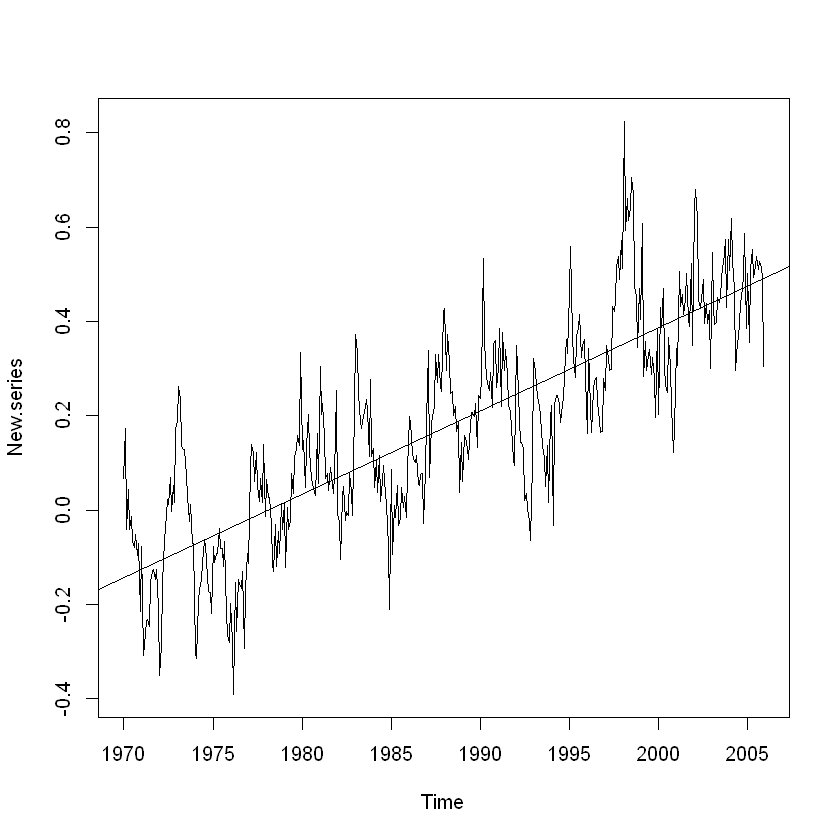

In [23]:
# Acá tomo un pedazo de la serie con windows y con time creo el vector de tiempo
# en el que se muestreó la serie de tiempo.

New.series <- window(Global.ts, start=c(1970, 1), end=c(2005, 12))
New.time <- time(New.series)
plot(New.series); abline(reg=lm(New.series ~ New.time))

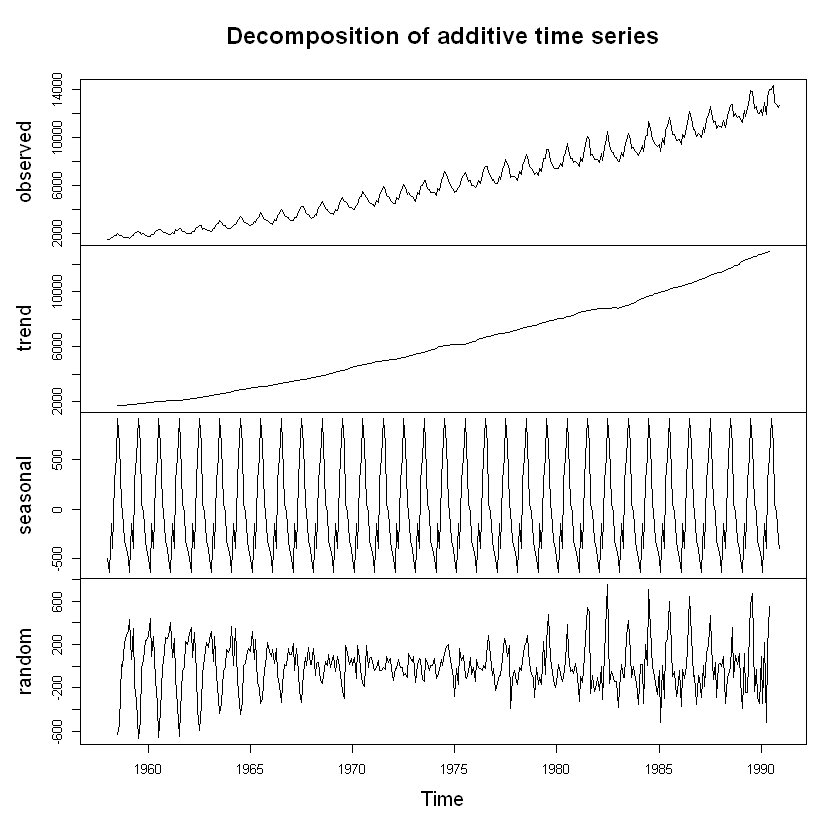

In [24]:
plot(decompose(Elec.ts))# La función decompose() descompone los datos, estima tendencia y efectos estacionales
                        # usando el método de medias móviles. Guarda que estoy usando la serie Elect.ts

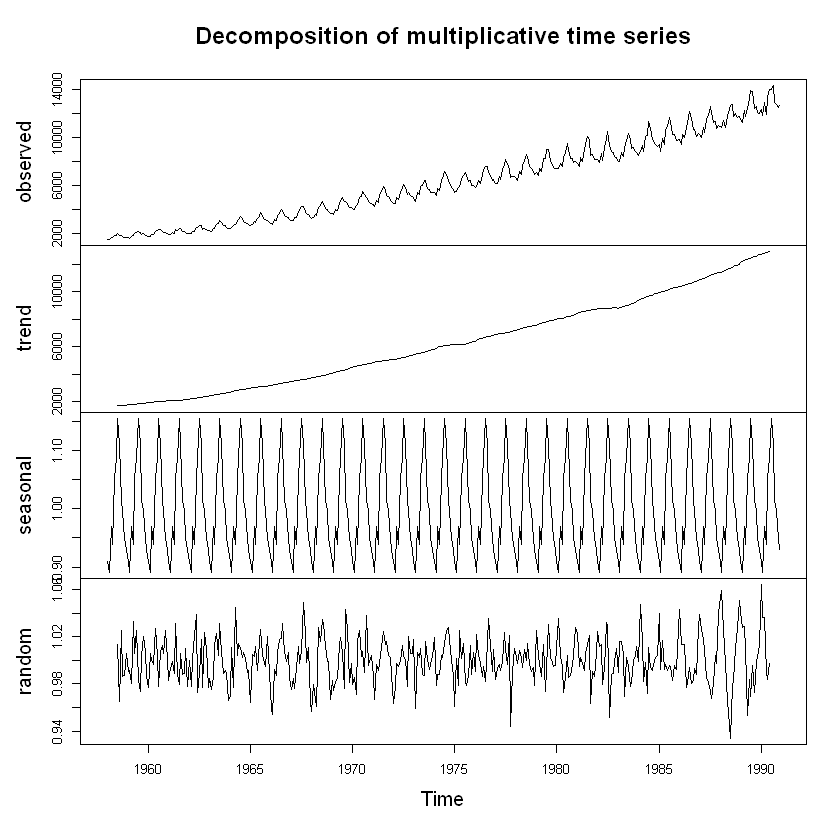

In [25]:
Elec.decom <- decompose(Elec.ts, type = "mult")# en este caso el efecto estacional es multiplicativo
plot(Elec.decom)

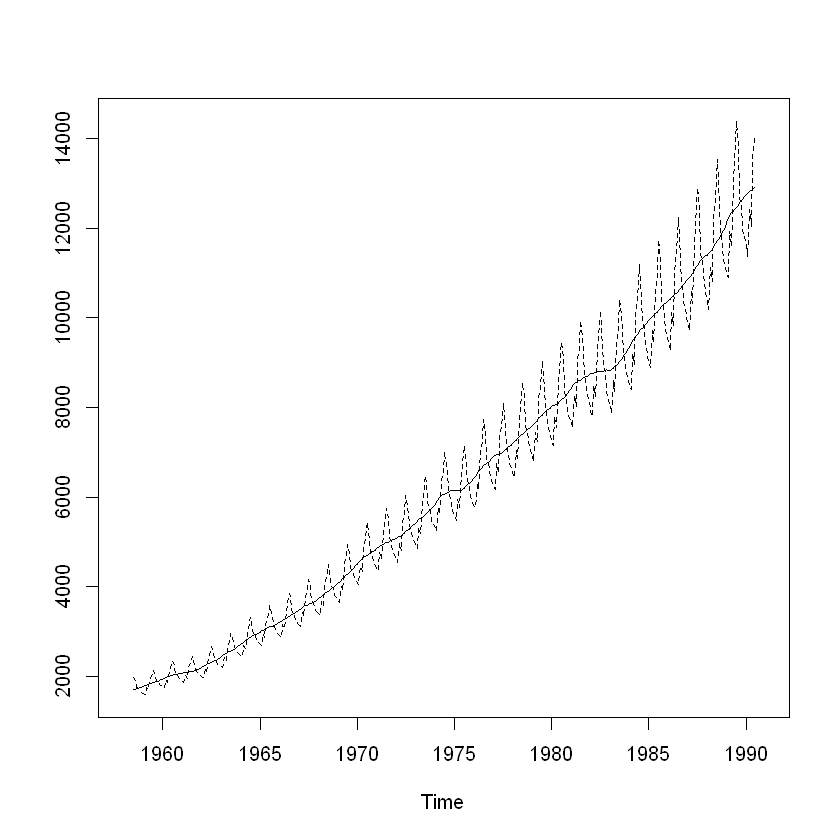

In [26]:
# la tendencia con el efecto estacional multiplicativo superpuesto
Trend <- Elec.decom$trend
Seasonal <- Elec.decom$seasonal
ts.plot(cbind(Trend, Trend * Seasonal), lty = 1:2)

In [27]:
detach(Maine.month)
detach(US.month)